   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

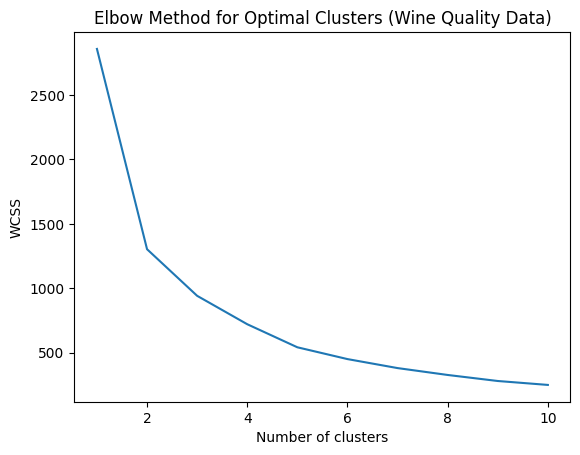

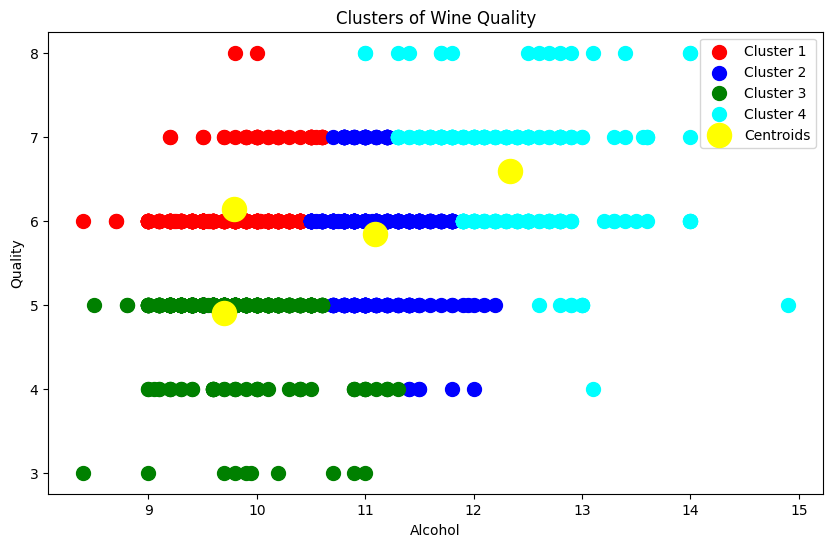

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the Wine Quality dataset
# Assuming you have downloaded the "winequality-red.csv" dataset from Kaggle
dataset_path = '/content/winequality-red.csv'
wine_data = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure
print(wine_data.head())  # To see the first few rows
print(wine_data.columns)  # To see all column names

# Step 2: Preprocess the data
# Select the columns for clustering (e.g., 'alcohol' and 'quality')
# You can choose any numeric features for clustering
wine_data = wine_data.replace('?', np.nan)
wine_data[['alcohol', 'quality']] = wine_data[['alcohol', 'quality']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in 'alcohol' or 'quality' for clustering purposes
wine_data = wine_data.dropna(subset=['alcohol', 'quality'])
X = wine_data[['alcohol', 'quality']].values

# Step 3: Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters (Wine Quality Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Apply KMeans clustering with the selected number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.show()
